In [22]:
from datetime import datetime
import calendar
import pandas as pd
import matplotlib.pyplot as plt

# Set matplotlib to run inline so we can view visualization
%matplotlib inline

# Import and call the Riak client to connect to your Riak TS node or cluster
# See http://docs.basho.com/riak/ts/latest/developing/python/ for more information
# on how to use the Riak client for Python
from riak import RiakClient
# Note: If you wish Riak TS to return date fields as Python dates
# and not epoch you need to set the transport_options as shown below
client = RiakClient(transport_options={'ts_convert_timestamp': True})

table = "WaterMeterMonthlyRollUp"

In [23]:
# Function to convert Python date to Unix Epoch
def convert_to_epoch ( date_to_convert ):
    return calendar.timegm(datetime.timetuple( date_to_convert )) * 1000

In [24]:
# Function to convert TsObject to list of lists
def ts_obj_to_list_of_lists (ts_obj):
    list_to_return = []
    for row in ts_obj.rows:
        list = []
        for i in range(len(row)):
            list.append(row[i])
        list_to_return.append(list)
    return list_to_return

In [25]:
# Retrieve all rows in WaterMeterMonthlyRollUp
start_date = datetime(2016, 1, 1, 0, 00)
end_date = datetime(2017, 2, 1, 0, 00)

query = """\
    SELECT *
    FROM WaterMeterMonthlyRollUp
    WHERE reading_date >= {} AND reading_date < {} AND
        customer_id = 'CUSTOMER-0001' AND meter_id = 'METER-0001'
""".format( convert_to_epoch( start_date ), convert_to_epoch( end_date ) )

data_set = client.ts_query(table, query)

for row in data_set.rows:
    print row

['CUSTOMER-0001', 'METER-0001', datetime.datetime(2016, 2, 1, 0, 0), 2, 2016, 3756.0, 225.35999999999999]
['CUSTOMER-0001', 'METER-0001', datetime.datetime(2016, 3, 1, 0, 0), 3, 2016, 3552.5, 213.15]
['CUSTOMER-0001', 'METER-0001', datetime.datetime(2016, 4, 1, 0, 0), 4, 2016, 3798.5, 227.91]
['CUSTOMER-0001', 'METER-0001', datetime.datetime(2016, 5, 1, 0, 0), 5, 2016, 3657.0, 219.42]
['CUSTOMER-0001', 'METER-0001', datetime.datetime(2016, 6, 1, 0, 0), 6, 2016, 3758.5, 225.51]
['CUSTOMER-0001', 'METER-0001', datetime.datetime(2016, 7, 1, 0, 0), 7, 2016, 4995.5, 299.72999999999996]
['CUSTOMER-0001', 'METER-0001', datetime.datetime(2016, 8, 1, 0, 0), 8, 2016, 5762.5, 345.75]
['CUSTOMER-0001', 'METER-0001', datetime.datetime(2016, 9, 1, 0, 0), 9, 2016, 3758.5, 225.51]
['CUSTOMER-0001', 'METER-0001', datetime.datetime(2016, 10, 1, 0, 0), 10, 2016, 3675.5, 220.53]
['CUSTOMER-0001', 'METER-0001', datetime.datetime(2016, 11, 1, 0, 0), 11, 2016, 3780.0, 226.79999999999998]
['CUSTOMER-0001', 'M

In [26]:
# Convert TsObject to list of lists and create Pandas DataFrame
boring_list = ts_obj_to_list_of_lists( data_set )
df = pd.DataFrame( boring_list )

# Set the column names and the index to the Date field
df.columns = ['Customer','Meter','Date','Month','Year', 'Gallons', 'Bill']
df.set_index('Date', False, False, True, True)

In [27]:
print df

                 Customer       Meter       Date  Month  Year  Gallons    Bill
Date                                                                          
2016-02-01  CUSTOMER-0001  METER-0001 2016-02-01      2  2016   3756.0  225.36
2016-03-01  CUSTOMER-0001  METER-0001 2016-03-01      3  2016   3552.5  213.15
2016-04-01  CUSTOMER-0001  METER-0001 2016-04-01      4  2016   3798.5  227.91
2016-05-01  CUSTOMER-0001  METER-0001 2016-05-01      5  2016   3657.0  219.42
2016-06-01  CUSTOMER-0001  METER-0001 2016-06-01      6  2016   3758.5  225.51
2016-07-01  CUSTOMER-0001  METER-0001 2016-07-01      7  2016   4995.5  299.73
2016-08-01  CUSTOMER-0001  METER-0001 2016-08-01      8  2016   5762.5  345.75
2016-09-01  CUSTOMER-0001  METER-0001 2016-09-01      9  2016   3758.5  225.51
2016-10-01  CUSTOMER-0001  METER-0001 2016-10-01     10  2016   3675.5  220.53
2016-11-01  CUSTOMER-0001  METER-0001 2016-11-01     11  2016   3780.0  226.80
2016-12-01  CUSTOMER-0001  METER-0001 2016-12-01    

In [28]:
print df.describe()

           Month         Year      Gallons       Bill
count  12.000000    12.000000    12.000000   12.00000
mean    6.500000  2016.083333  3993.916667  239.63500
std     3.605551     0.288675   671.492836   40.28957
min     1.000000  2016.000000  3552.500000  213.15000
25%     3.750000  2016.000000  3670.875000  220.25250
50%     6.500000  2016.000000  3758.500000  225.51000
75%     9.250000  2016.000000  3798.500000  227.91000
max    12.000000  2017.000000  5762.500000  345.75000


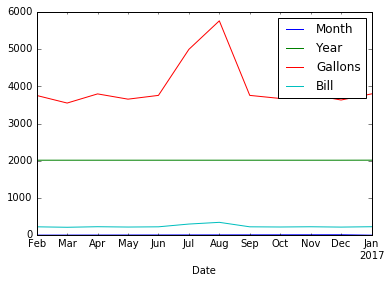

In [29]:
df.plot()